# Import Library

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

# EDA

Discharge에서 Loading으로 이어가는 컨테이너에 대해서만 데이터 분석

In [2]:
cwd = os.getcwd()
print('현재 폴더 경로 : ', cwd)
# 폴더 위치 변경
os.chdir("C:\\Users\hyunj\\Dropbox\\종합설계프로젝트\\중요\\데이터")
print('변경 후 폴더 경로 : ', cwd)
print('현재 폴더 파일 : ', os.listdir())
data = pd.read_csv('ContainerPerspectiv_DStoLD.csv', encoding='CP949')
print('feature 항목 : ', data.columns)
data

현재 폴더 경로 :  c:\Users\hyunj\Desktop\종합설계프로젝트
변경 후 폴더 경로 :  c:\Users\hyunj\Desktop\종합설계프로젝트
현재 폴더 파일 :  ['Block perspective.xlsx', 'CHE I perspective.xlsx', 'CHE II perspective.xlsx', 'Container perspective.xlsx', 'ContainerPersp.csv', 'ContainerPerspectiv_DStoLD.csv', 'FULL', 'Gate perspective.xlsx', 'hanjin.csv', 'ITV perspective.xlsx', 'POD', 'QC perspective.xlsx', 'Vessel perspective.xlsx', '디스코용 파일.csv', '분포', '분포.csv']
feature 항목 :  Index(['Case ID', 'Activity', 'Resource', 'Start Timestamp',
       'Complete Timestamp', 'Variant', 'Variant index', 'VESSEL', 'MCHN_ID',
       'FULL_EMPTY', 'POD', 'BLOCK_BAY'],
      dtype='object')


,Case ID,Activity,Resource,Start Timestamp,Complete Timestamp,Variant,Variant index,VESSEL,MCHN_ID,FULL_EMPTY,POD,BLOCK_BAY
0,BEAU2976719-1,DS-QUAYSIDE,QC,2018-01-27 16:00:39.000,2018-01-27 16:02:11.000,Variant 1,1,MAUO-001/2018,GC101,F,KRPUS,2B-19
1,BEAU2976719-1,DS-MOVE,YT,2018-01-27 16:02:11.000,2018-01-27 16:10:10.000,Variant 1,1,MAUO-001/2018,YT586,F,KRPUS,2B-19
2,BEAU2976719-1,DS-YARDSIDE,TC,2018-01-27 16:10:10.000,2018-01-27 16:11:42.000,Variant 1,1,MAUO-001/2018,TC223,F,KRPUS,2B-19
3,BEAU2976719-1,LD-YARDSIDE,TC,2018-01-31 20:01:47.000,2018-01-31 20:04:20.000,Variant 1,1,ALAP-001/2018,TC223,F,CAVAN,2B-19
4,BEAU2976719-1,LD-MOVE,YT,2018-01-31 20:04:20.000,2018-01-31 20:21:20.000,Variant 1,1,ALAP-001/2018,YT511,F,CAVAN,2B-19
...,...,...,...,...,...,...,...,...,...,...,...,...
149347,TRLU8938070-9,DS-MOVE,YT,2018-01-11 08:07:14.000,2018-01-11 08:14:50.000,Variant 1,1,SFNZ-001/2018,YT570,F,HKHKG,3A-13
149348,TRLU8938070-9,DS-YARDSIDE,TC,2018-01-11 08:14:50.000,2018-01-11 08:16:22.000,Variant 1,1,SFNZ-001/2018,TC215,F,HKHKG,3A-13
149349,TRLU8938070-9,LD-YARDSIDE,TC,2018-01-11 09:18:09.000,2018-01-11 09:20:42.000,Variant 1,1,SFNZ-001/2018,TC216,F,HKHKG,3A-13
149350,TRLU8938070-9,LD-MOVE,YT,2018-01-11 09:20:42.000,2018-01-11 09:50:51.000,Variant 1,1,SFNZ-001/2018,YT539,F,HKHKG,3A-13


In [3]:
data['Start Timestamp'] = pd.to_datetime(data['Start Timestamp'])
data['Complete Timestamp'] = pd.to_datetime(data['Complete Timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149352 entries, 0 to 149351
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Case ID             149352 non-null  object        
 1   Activity            149352 non-null  object        
 2   Resource            149352 non-null  object        
 3   Start Timestamp     149352 non-null  datetime64[ns]
 4   Complete Timestamp  149352 non-null  datetime64[ns]
 5   Variant             149352 non-null  object        
 6   Variant index       149352 non-null  int64         
 7   VESSEL              149352 non-null  object        
 8   MCHN_ID             149352 non-null  object        
 9   FULL_EMPTY          149352 non-null  object        
 10  POD                 149352 non-null  object        
 11  BLOCK_BAY           149352 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 13.7+ MB


In [4]:
containerid_unique_list = list(data['Case ID'].unique())
containerid_list = list(data['Case ID'].unique())

In [7]:
# Dwell Time을 저장하기 위한 빈 데이터프레임 생성
dwelltime_df = pd.DataFrame(columns=["FM", 'Duration'])
i = 0
for containerid in tqdm(containerid_list, desc = "FULL/EMPTY 별로 Duration 계산중") :
    temp_df = data[data['Case ID'] == containerid].reset_index(drop=True)
    fullorempty = temp_df.loc[4, "FULL_EMPTY"]
    end_DS = temp_df[temp_df['Activity'] == 'DS-YARDSIDE'].loc[:, 'Complete Timestamp'][2]
    start_LD = temp_df[temp_df['Activity'] == 'LD-YARDSIDE'].loc[:, 'Start Timestamp'][3]
    duration = (start_LD - end_DS).days * 24 * 60 * 60 + (start_LD - end_DS).seconds
    
    dwelltime_df.loc[i] = [fullorempty, duration]
    i += 1

FULL/EMPTY 별로 Duration 계산중: 100%|██████████| 24892/24892 [05:38<00:00, 73.63it/s]


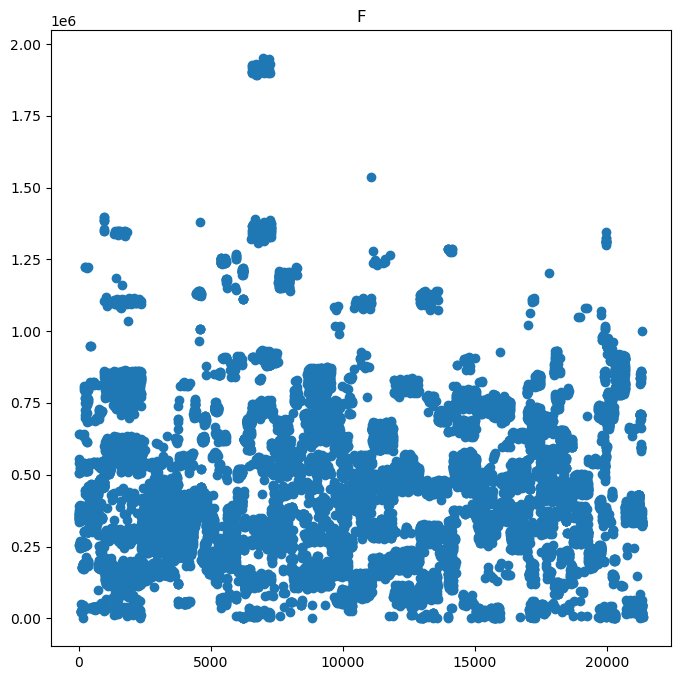

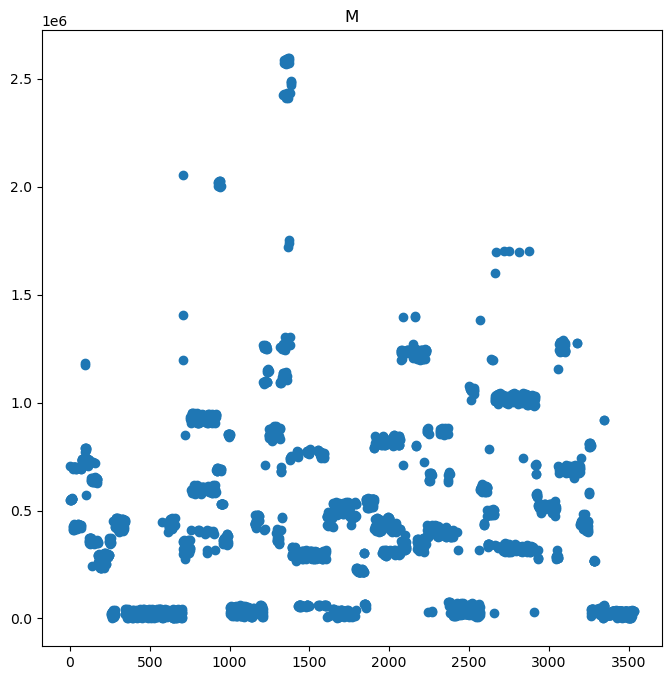

In [9]:
# 폴더 이동
os.chdir("C:\\Users\hyunj\\Dropbox\\종합설계프로젝트\\중요\\데이터\\FULL")

full_unique_list = list(dwelltime_df['FM'].unique())
for full in full_unique_list :
    temp_df = dwelltime_df[dwelltime_df['FM'] == full]
    figure = plt.figure(figsize = (8,8))
    file_name = full + ".jpg"
    x = range(len(temp_df))
    y = list(temp_df.loc[:, 'Duration'])
    plt.title(full)
    plt.scatter(x,y)
    plt.savefig(file_name, dpi=300)
